In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [7]:
naive_bayes_results_file = "naive_bayes.json"
with open(naive_bayes_results_file, 'r') as fin:
    naive_bayes = json.load(fin)

In [8]:
print(json.dumps(
    naive_bayes,
    indent=2
))

{
  "P": {
    "Coarse": {
      "baseline": {
        "RandomForestClassifier(max_depth=2, random_state=0)": {
          "Score": [
            0.49895843666302947
          ],
          "Top-3": [
            0.8488245213768475
          ]
        },
        "AdaBoostClassifier(random_state=0)": {
          "Score": [
            0.45620474159309593
          ],
          "Top-3": [
            0.8589921634758456
          ]
        }
      },
      "continuous": {
        "GaussianNB()": {
          "Score": 0.4980656680884833,
          "Top-3": 0.6974506497371292
        },
        "MultinomialNB()": {
          "Score": 0.497817676817776,
          "Top-3": 0.838508084515425
        },
        "ComplementNB()": {
          "Score": 0.4745064973712925,
          "Top-3": 0.6274179148893959
        }
      },
      "discrete": {
        "KDEClassifier()": {
          "Score": 0.5010910533624281,
          "Top-3": 0.8272168220591153
        },
        "KDEClassifier(kernel='exponen

In [22]:
naive = {
    'P_Fine': [0.39938894344750964, 0.5864059756569354],
    'P_Coarse': [0.39938894344750964, 0.8377228223670505],
    'T_Fine': [0.351846452866861, 0.6439504373177842],
    'T_Coarse': [0.3686953352769679, 0.877089407191448],
    'Z_Fine': [0.3216570624801488, 0.5959208675529742],
    'Z_Coarse': [0.3339307591088525, 0.8537819320295839],
}

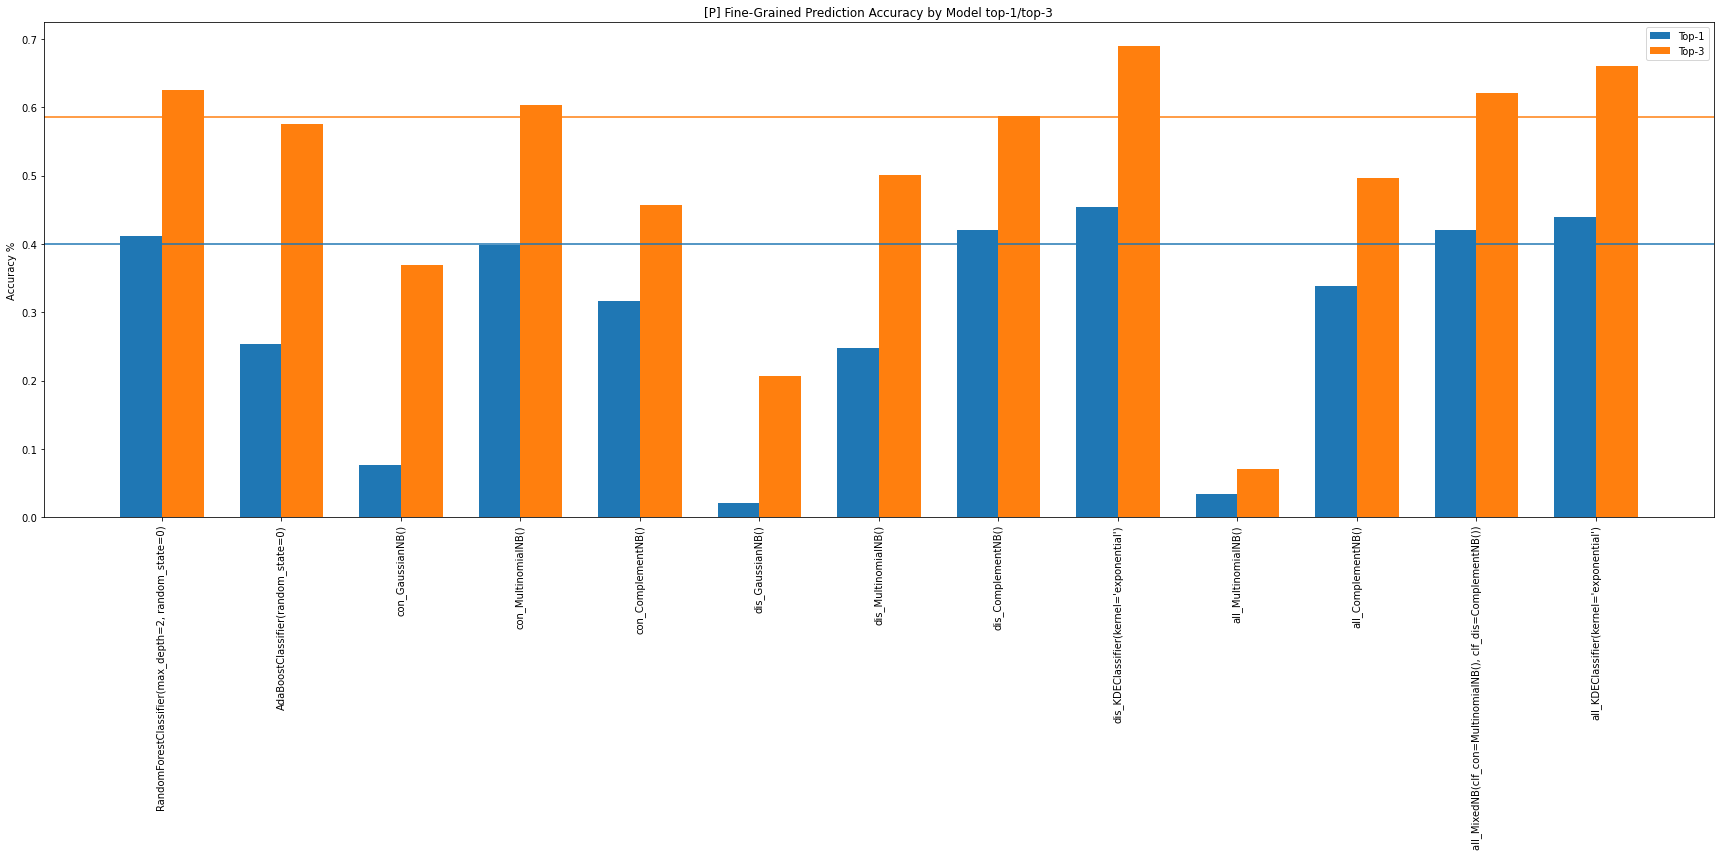

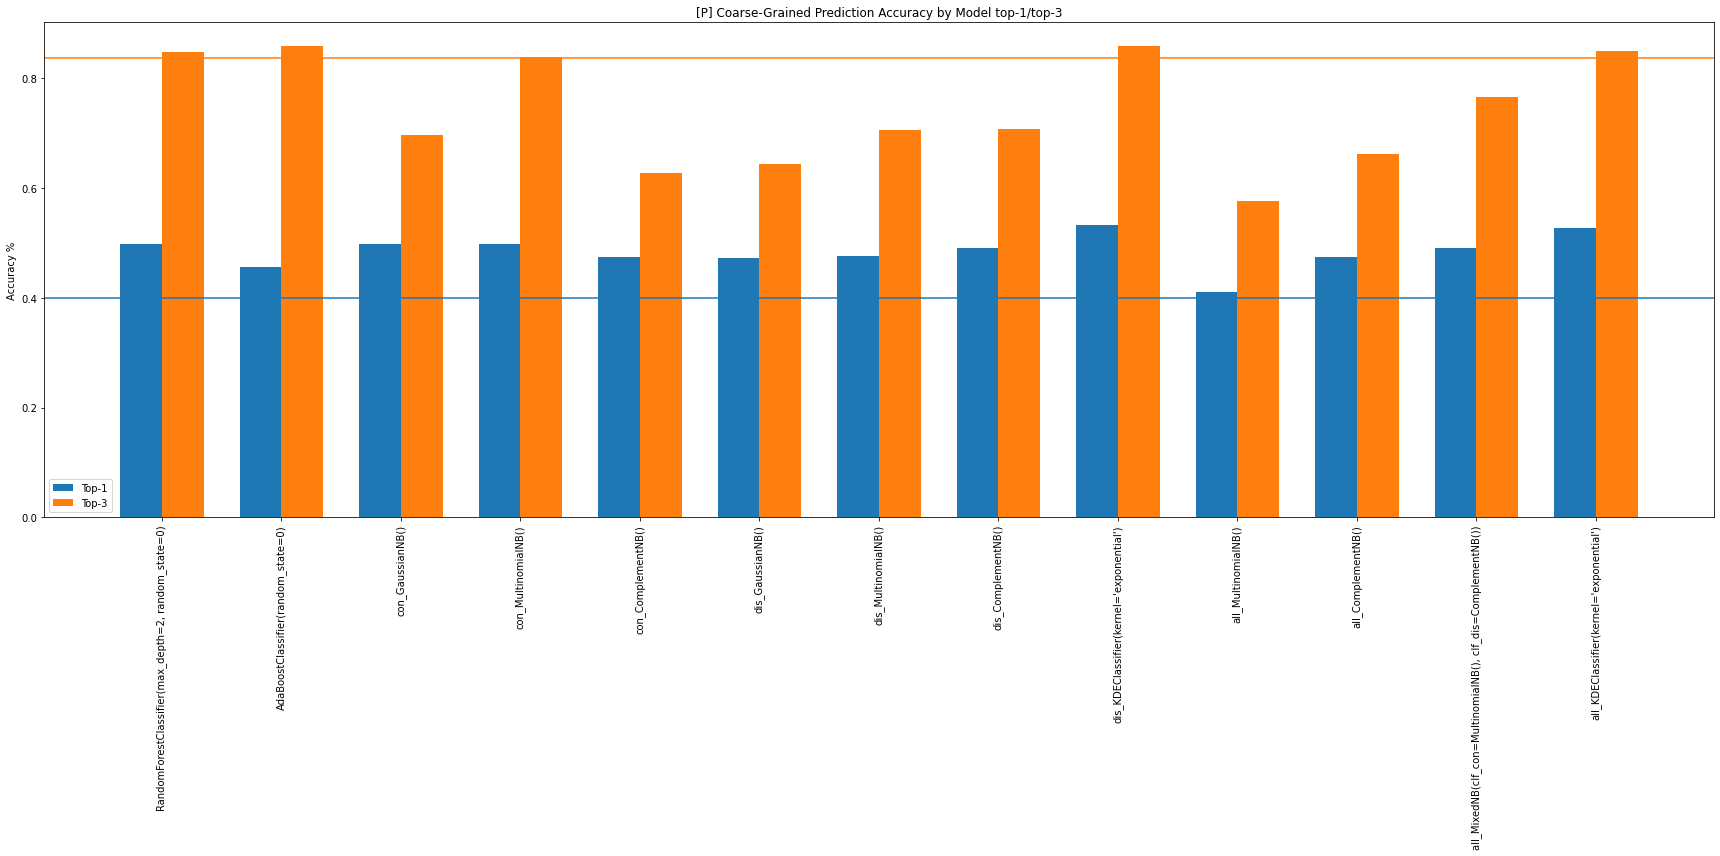

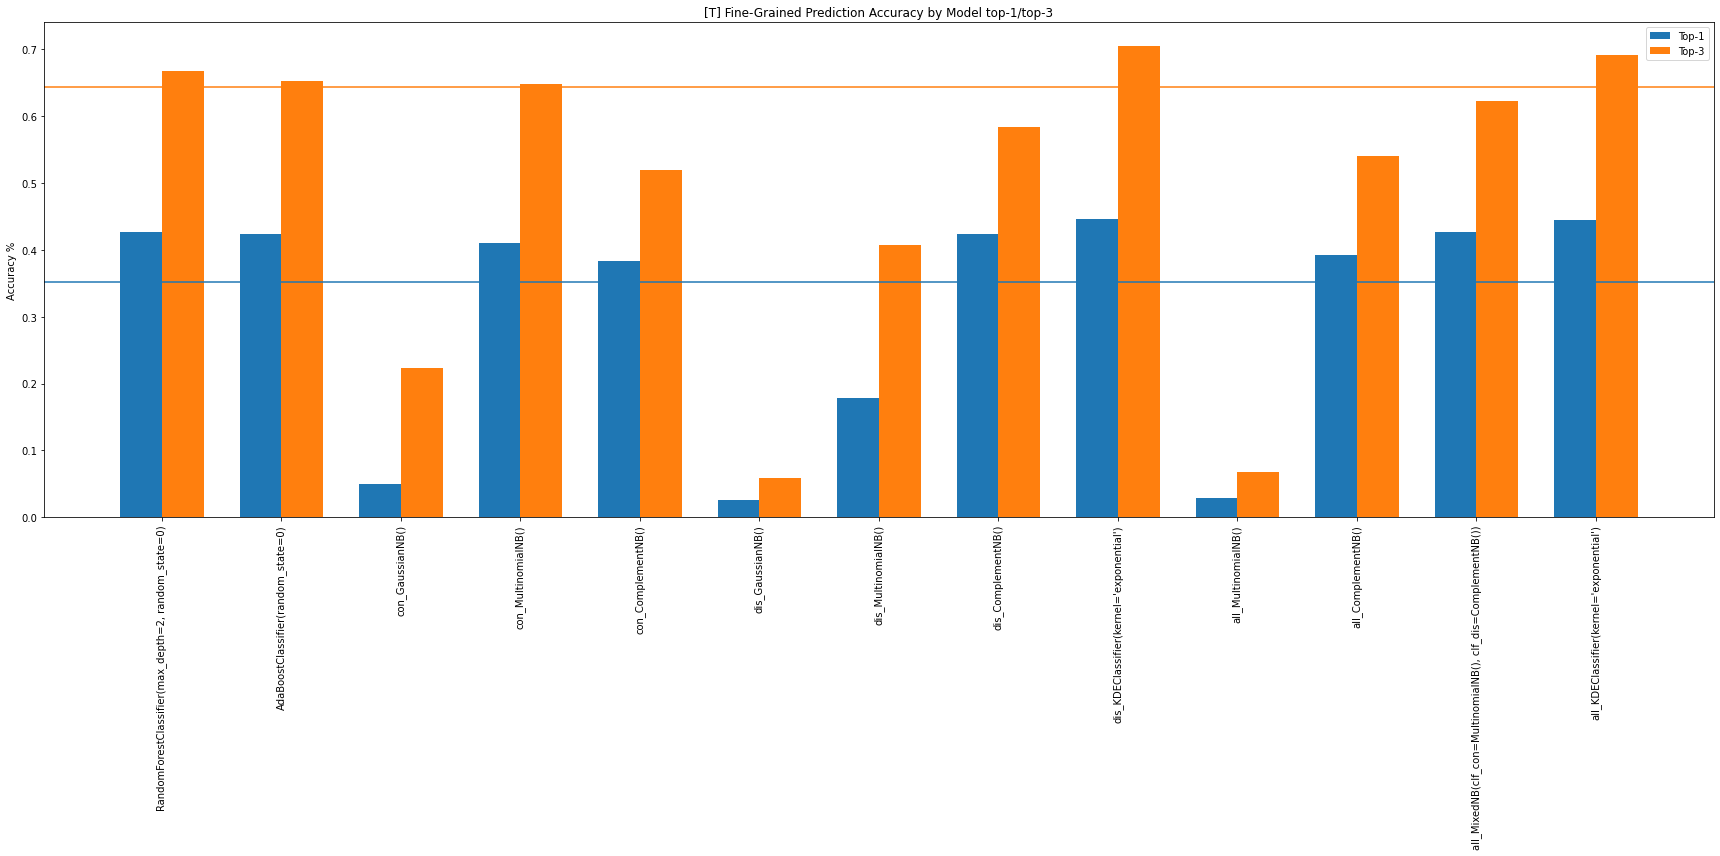

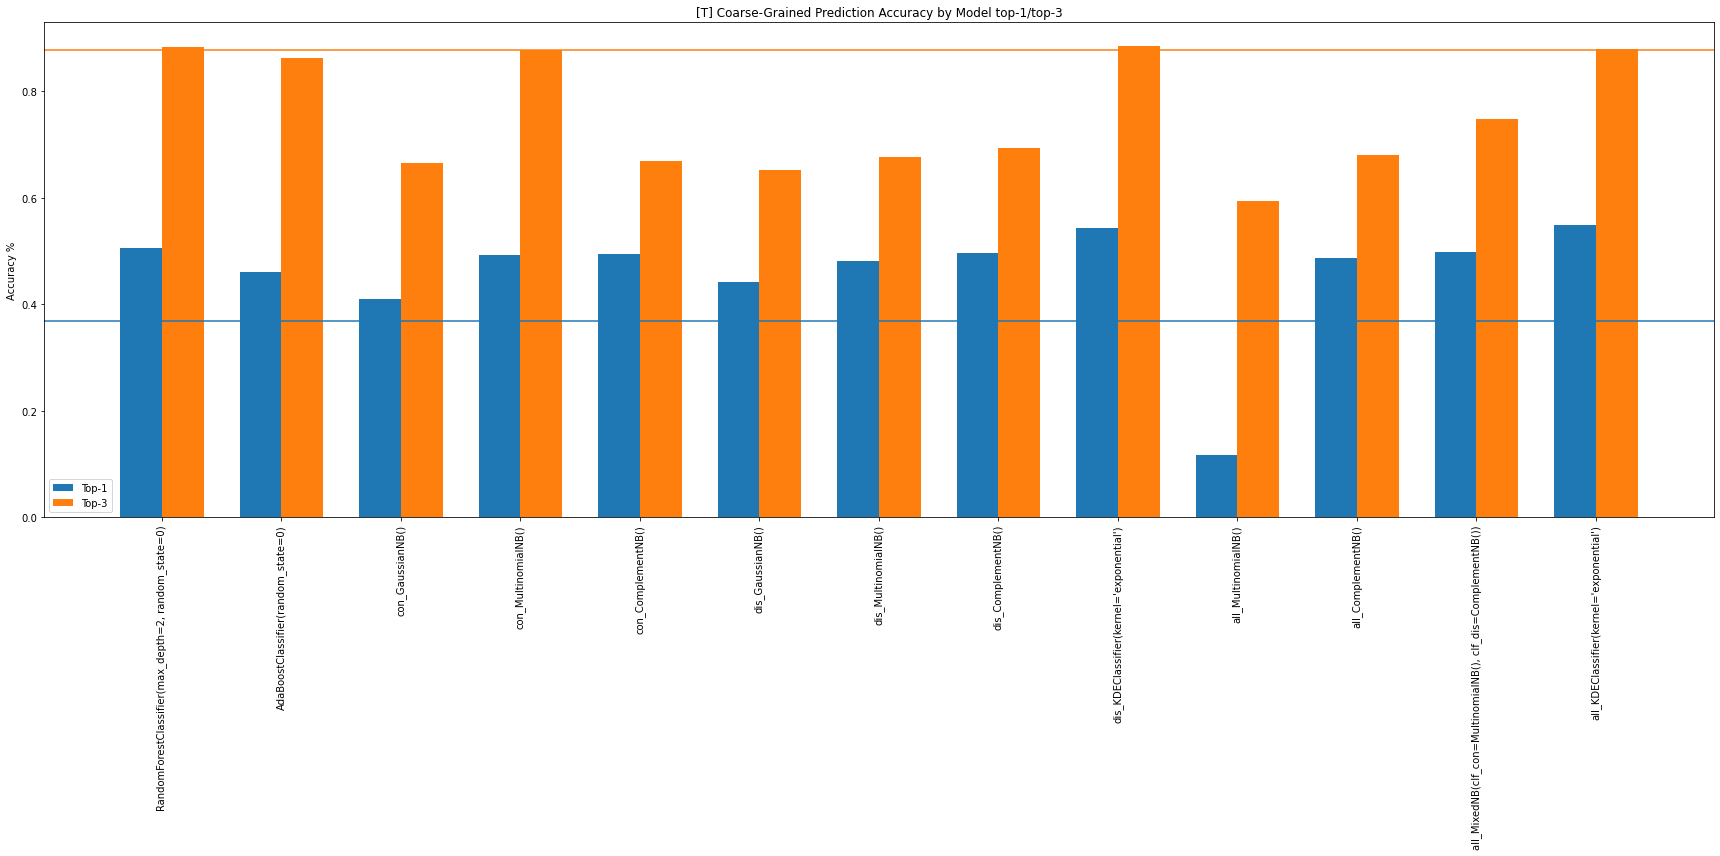

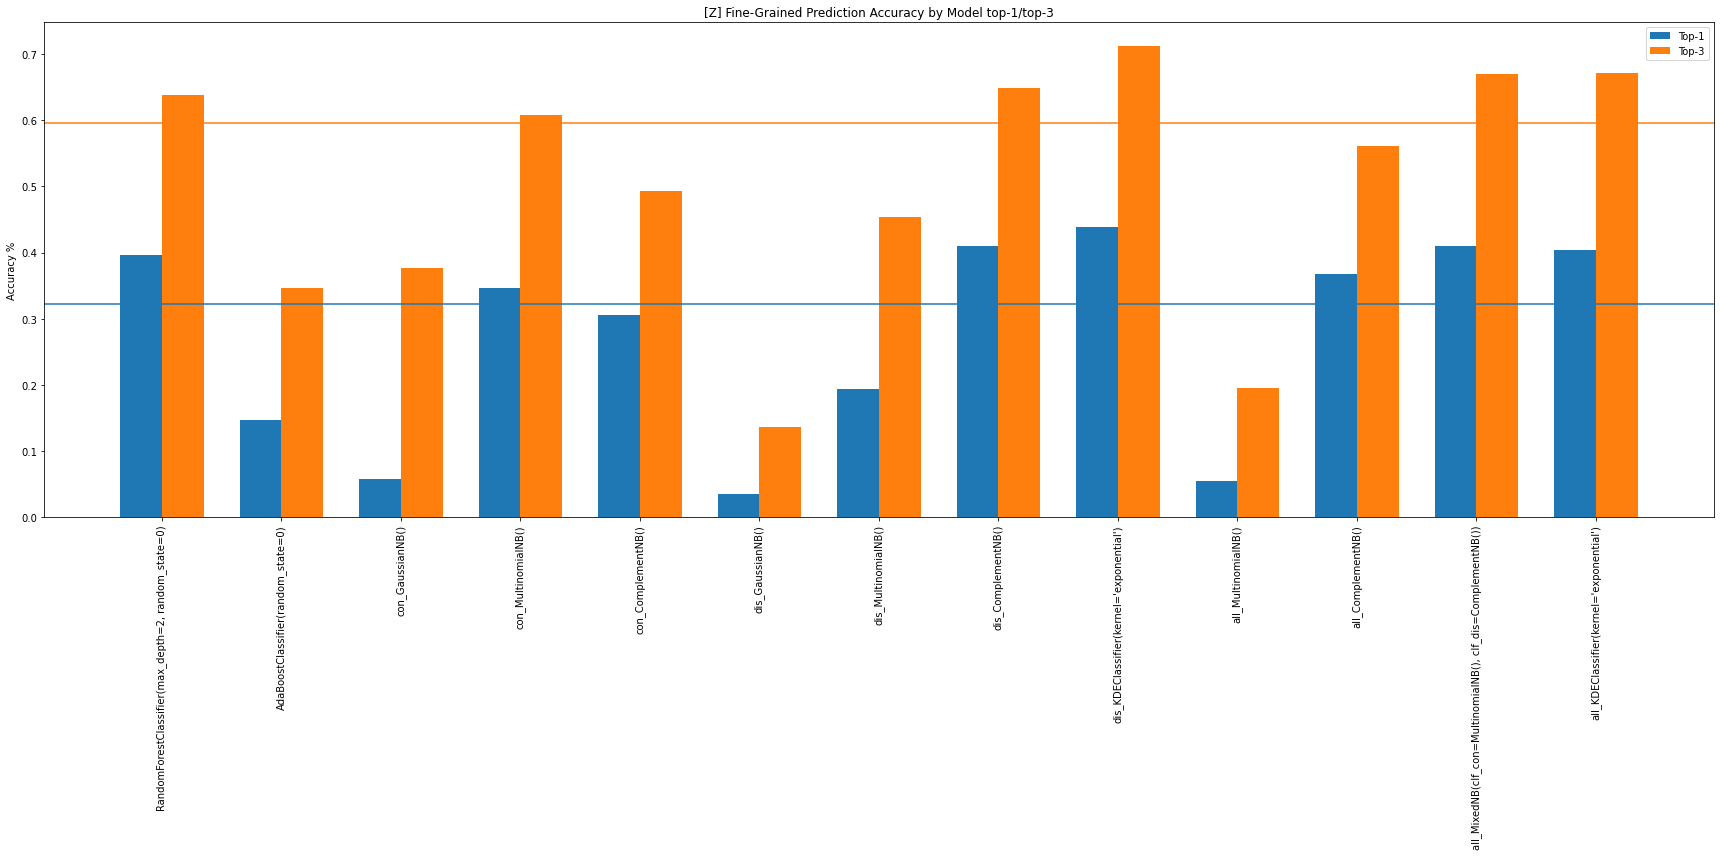

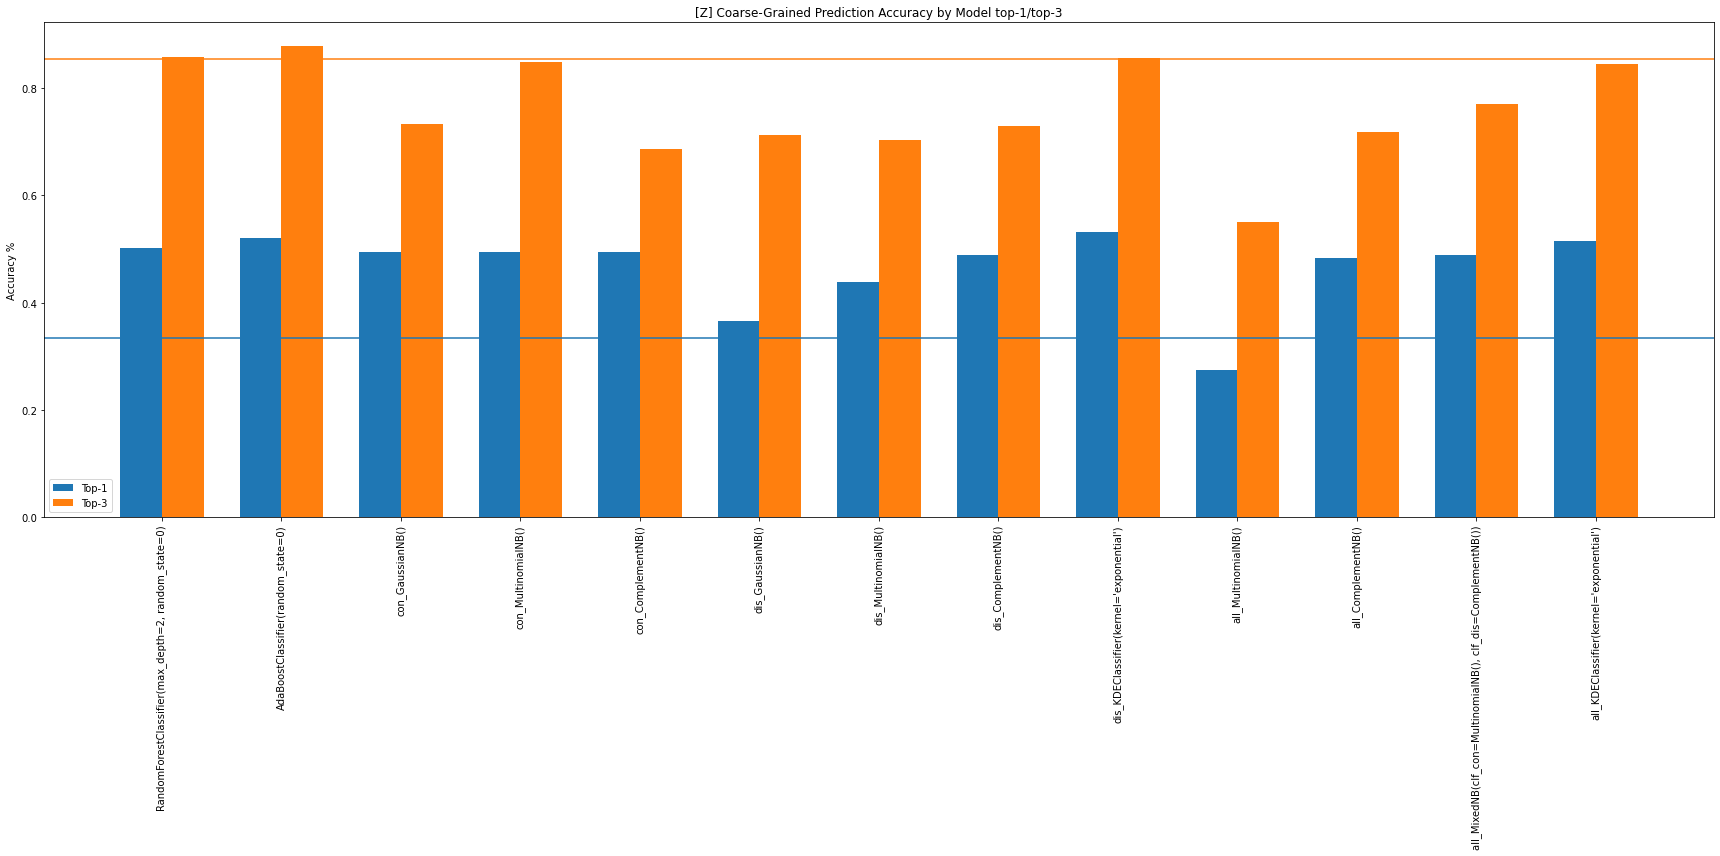

In [31]:
def plot_race(race,data):
    for grain in ["Fine", "Coarse"]:
        fig, ax = plt.subplots(figsize=(24,12))
        baseline = [
            "RandomForestClassifier(max_depth=2, random_state=0)",
            "AdaBoostClassifier(random_state=0)",
        ]
        modes = ["continuous", "discrete", "all"]
        modalities = [
            "GaussianNB()",
            "MultinomialNB()",
            "ComplementNB()",
            "MixedNB(clf_con=MultinomialNB(), clf_dis=ComplementNB())",
            "KDEClassifier(kernel='exponential')",
        ]
        
        labels = baseline[:]
        scores = [data[race][grain]["baseline"][m]["Score"] for m in baseline]
        top_k_scores = [data[race][grain]["baseline"][m]["Top-3"] for m in baseline]
        
        for mode in modes:
            for model in modalities:
                if (model in data[race][grain][mode]):
                    labels.append(f"{mode[:3]}_{model}")
                    scores.append(data[race][grain][mode][model]["Score"])
                    top_k_scores.append(data[race][grain][mode][model]["Top-3"])

        x = np.arange(len(labels))
        width = 0.35

        rects1 = ax.bar(x-width/2,scores,width,label=f"Top-1",color="tab:blue")
        rects2 = ax.bar(x+width/2,top_k_scores,width,label=f"Top-3",color="tab:orange")

        ax.set_ylabel('Accuracy %')
        ax.set_title(f'[{race}] {grain}-Grained Prediction Accuracy by Model top-1/top-3')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation='vertical')
        ax.legend()
        
        ax.axhline(naive[f"{race}_{grain}"][0],color="tab:blue")
        ax.axhline(naive[f"{race}_{grain}"][1],color="tab:orange")
        
        fig.tight_layout()
        plt.show()
for race in "PTZ":
    plot_race(race,naive_bayes)

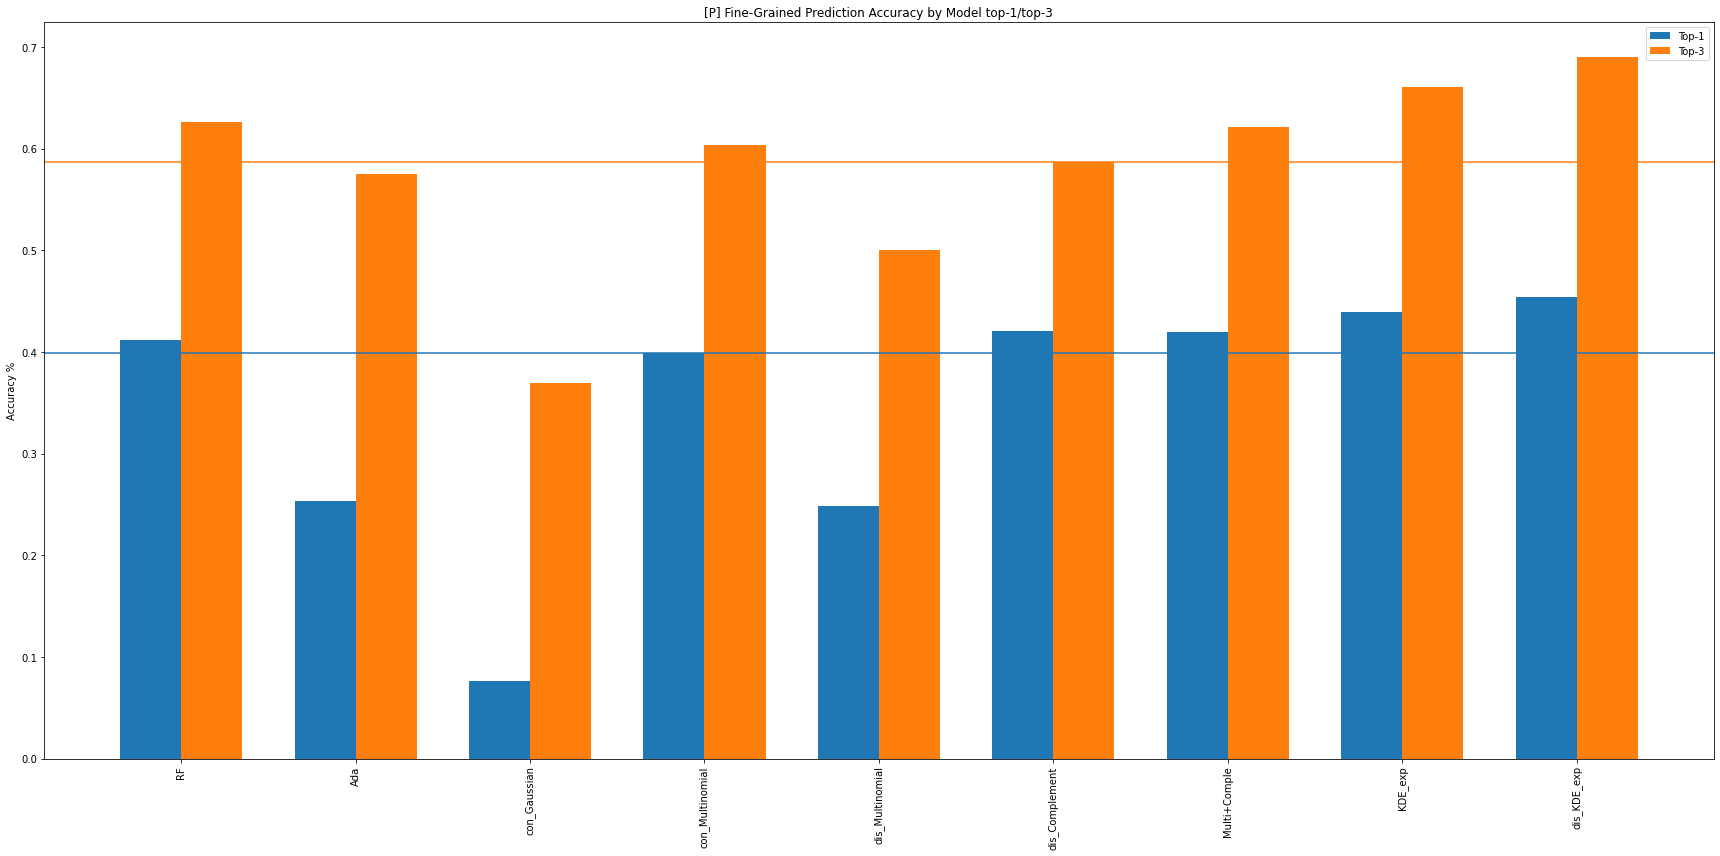

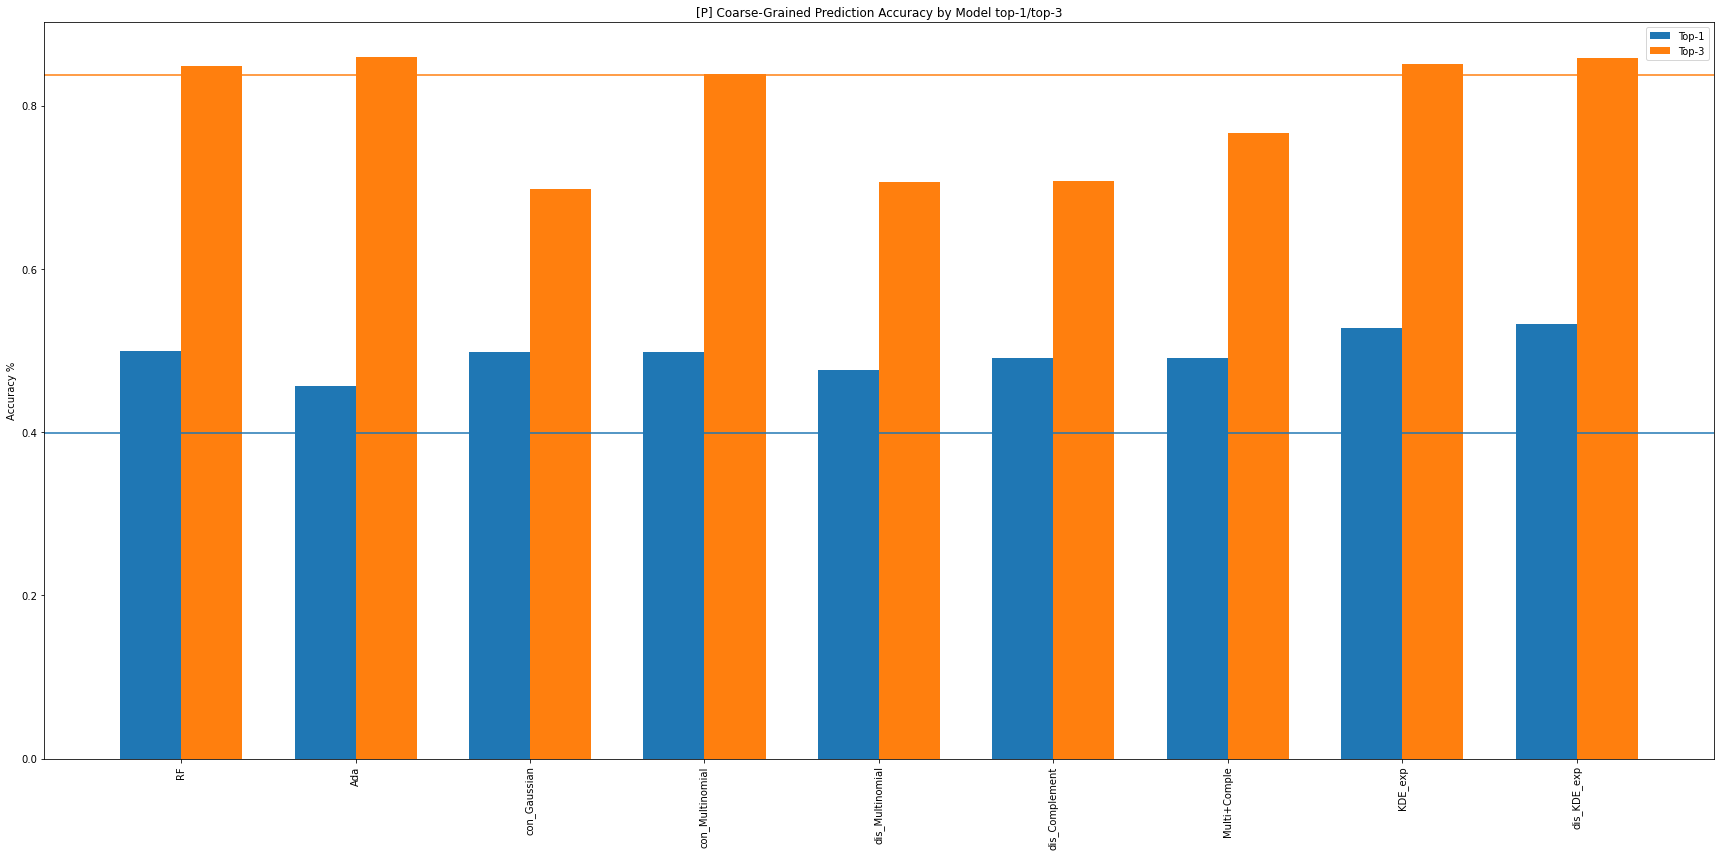

In [37]:
def plot_race_subset(race,data):
    for grain in ["Fine", "Coarse"]:
        fig, ax = plt.subplots(figsize=(24,12))
        baseline = [
            "RandomForestClassifier(max_depth=2, random_state=0)",
            "AdaBoostClassifier(random_state=0)",
        ]
        modes = [
            ("continuous", ["GaussianNB()","MultinomialNB()"]),
            ("discrete", ["MultinomialNB()","ComplementNB()"]),
            ("all", ["MixedNB(clf_con=MultinomialNB(), clf_dis=ComplementNB())","KDEClassifier(kernel='exponential')"]),
            ("discrete", ["KDEClassifier(kernel='exponential')"])
        ]
        
        labels = ["RF","Ada","con_Gaussian","con_Multinomial","dis_Multinomial","dis_Complement","Multi+Comple","KDE_exp","dis_KDE_exp"]
        scores = [data[race][grain]["baseline"][m]["Score"] for m in baseline]
        top_k_scores = [data[race][grain]["baseline"][m]["Top-3"] for m in baseline]
        
        for mode, modalities in modes:
            for model in modalities:
                if (model in data[race][grain][mode]):
                    scores.append(data[race][grain][mode][model]["Score"])
                    top_k_scores.append(data[race][grain][mode][model]["Top-3"])

        x = np.arange(len(labels))
        width = 0.35

        rects1 = ax.bar(x-width/2,scores,width,label=f"Top-1",color="tab:blue")
        rects2 = ax.bar(x+width/2,top_k_scores,width,label=f"Top-3",color="tab:orange")

        ax.set_ylabel('Accuracy %')
        ax.set_title(f'[{race}] {grain}-Grained Prediction Accuracy by Model top-1/top-3')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation='vertical')
        ax.legend()
        
        ax.axhline(naive[f"{race}_{grain}"][0],color="tab:blue")
        ax.axhline(naive[f"{race}_{grain}"][1],color="tab:orange")
        
        fig.tight_layout()
        plt.show()
for race in "PTZ":
    plot_race_subset(race,naive_bayes)

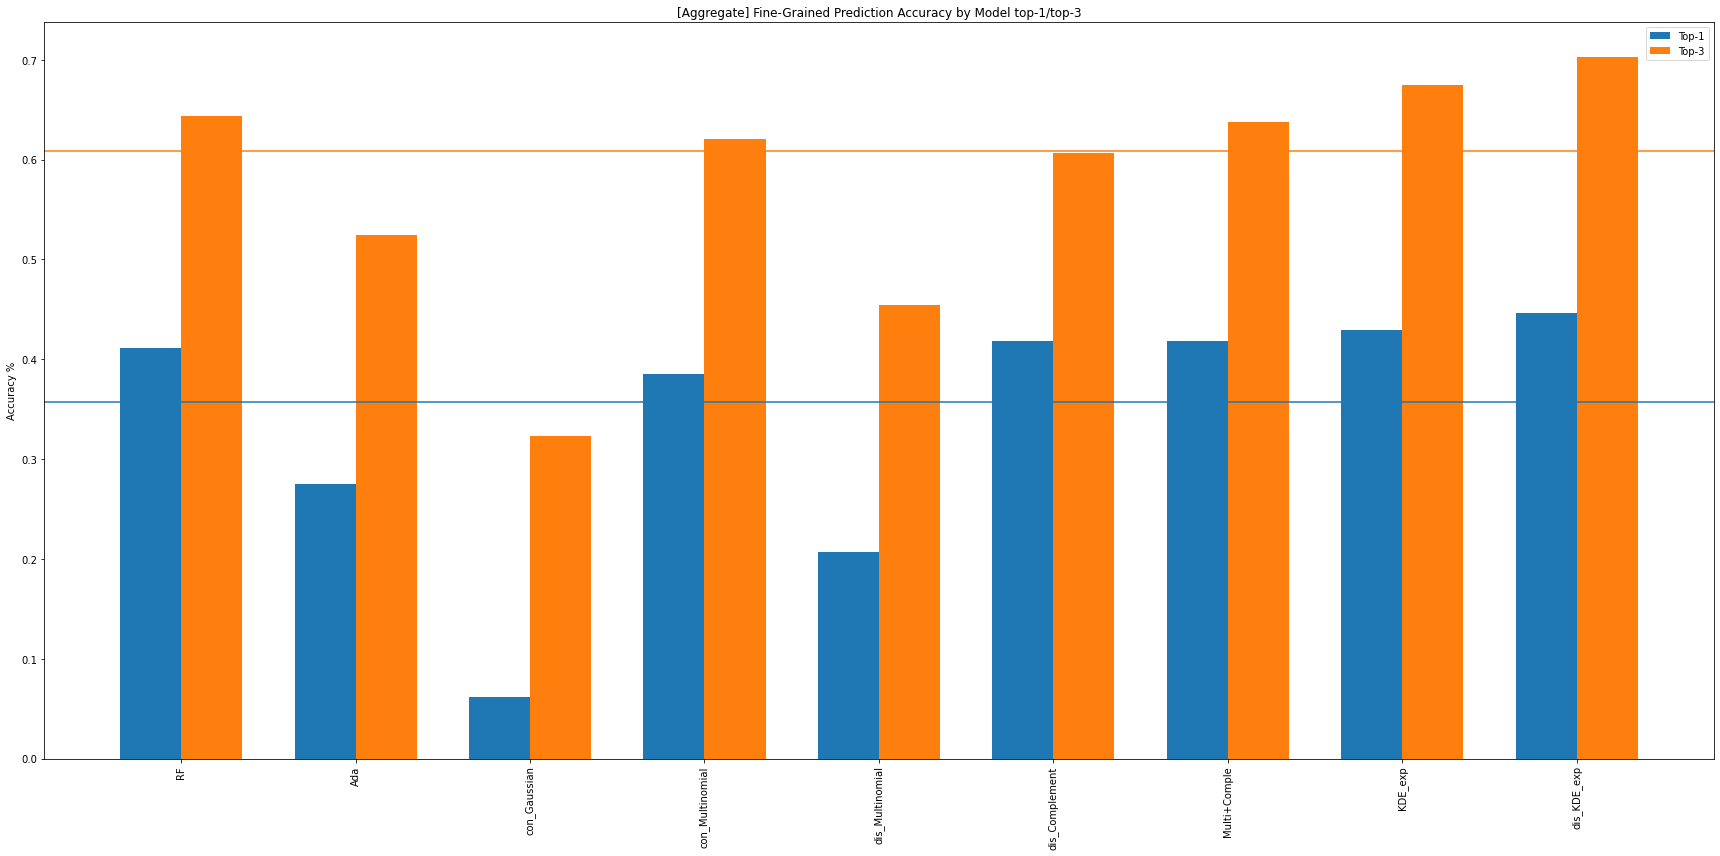

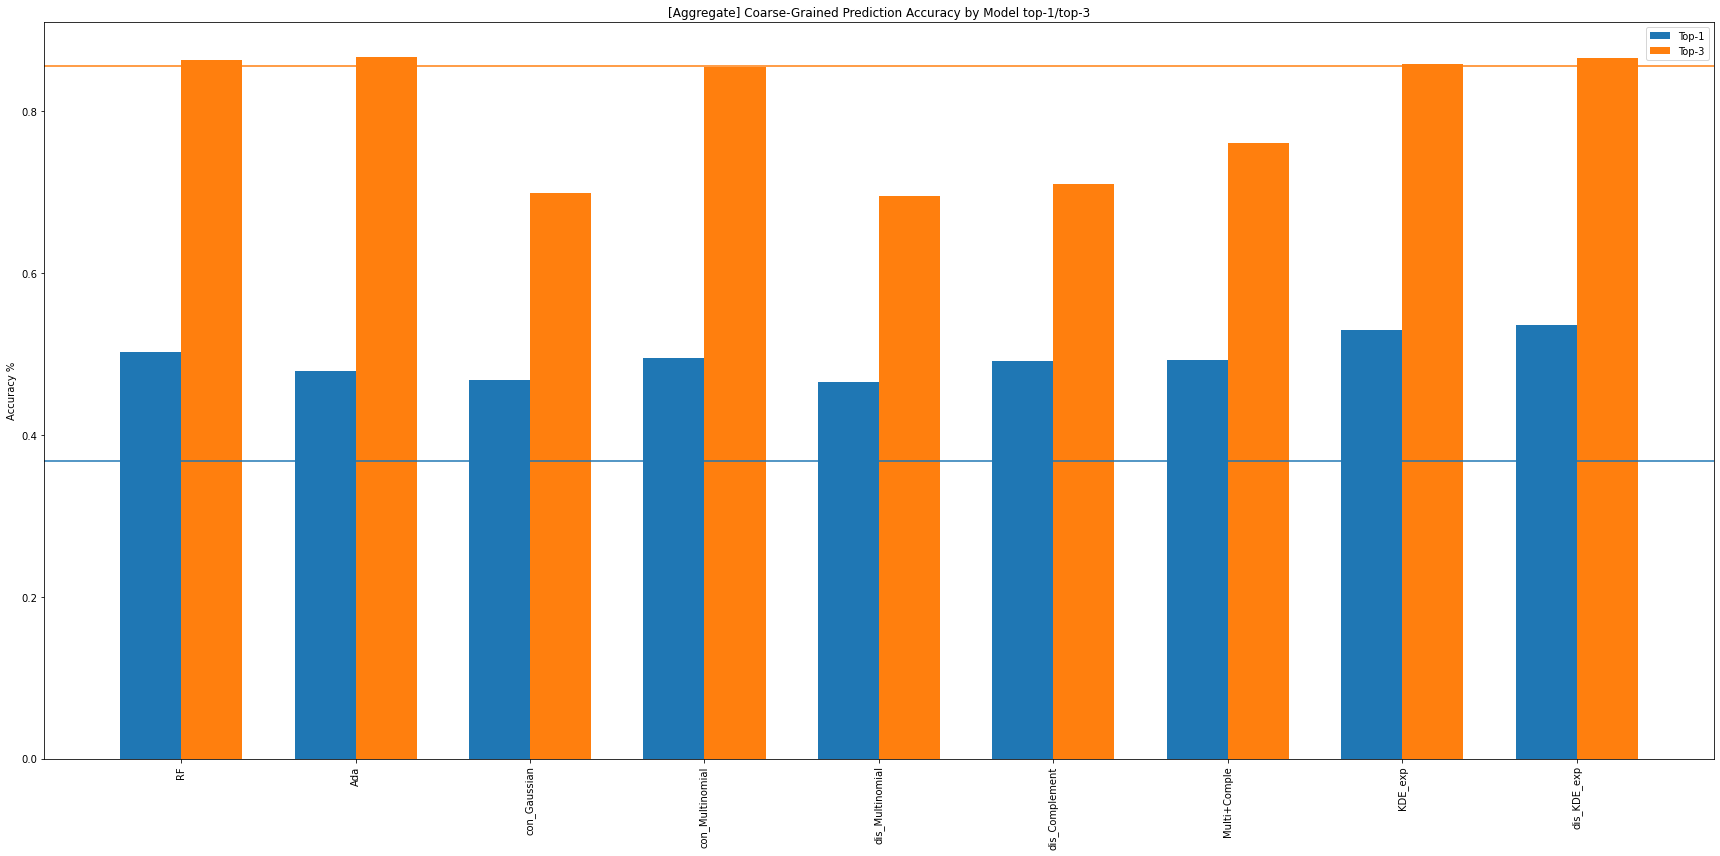

In [40]:
def plot_avg_subset(data):
    for grain in ["Fine", "Coarse"]:
        fig, ax = plt.subplots(figsize=(24,12))
        baseline = [
            "RandomForestClassifier(max_depth=2, random_state=0)",
            "AdaBoostClassifier(random_state=0)",
        ]
        modes = [
            ("continuous", ["GaussianNB()","MultinomialNB()"]),
            ("discrete", ["MultinomialNB()","ComplementNB()"]),
            ("all", ["MixedNB(clf_con=MultinomialNB(), clf_dis=ComplementNB())","KDEClassifier(kernel='exponential')"]),
            ("discrete", ["KDEClassifier(kernel='exponential')"])
        ]
        
        labels = ["RF","Ada","con_Gaussian","con_Multinomial","dis_Multinomial","dis_Complement","Multi+Comple","KDE_exp","dis_KDE_exp"]
        scores = [np.mean([data[race][grain]["baseline"][m]["Score"] for race in "PTZ"]) for m in baseline]
        top_k_scores = [np.mean([data[race][grain]["baseline"][m]["Top-3"] for race in "PTZ"]) for m in baseline]
        
        for mode, modalities in modes:
            for model in modalities:
                scores.append(np.mean([data[race][grain][mode][model]["Score"] for race in "PTZ"]))
                top_k_scores.append(np.mean([data[race][grain][mode][model]["Top-3"] for race in "PTZ"]))

        x = np.arange(len(labels))
        width = 0.35

        rects1 = ax.bar(x-width/2,scores,width,label=f"Top-1",color="tab:blue")
        rects2 = ax.bar(x+width/2,top_k_scores,width,label=f"Top-3",color="tab:orange")

        ax.set_ylabel('Accuracy %')
        ax.set_title(f'[Aggregate] {grain}-Grained Prediction Accuracy by Model top-1/top-3')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation='vertical')
        ax.legend()
        
        ax.axhline(np.mean([naive[f"{race}_{grain}"][0] for race in "PTZ"]),color="tab:blue")
        ax.axhline(np.mean([naive[f"{race}_{grain}"][1] for race in "PTZ"]),color="tab:orange")
        
        fig.tight_layout()
        plt.show()
plot_avg_subset(naive_bayes)